In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from collections import defaultdict
import seaborn as sb
import re

%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.exceptions import ConvergenceWarning
cancer = load_breast_cancer()

In [19]:
dataframe = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns= np.append(cancer['feature_names'], ['target']))

In [20]:
dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


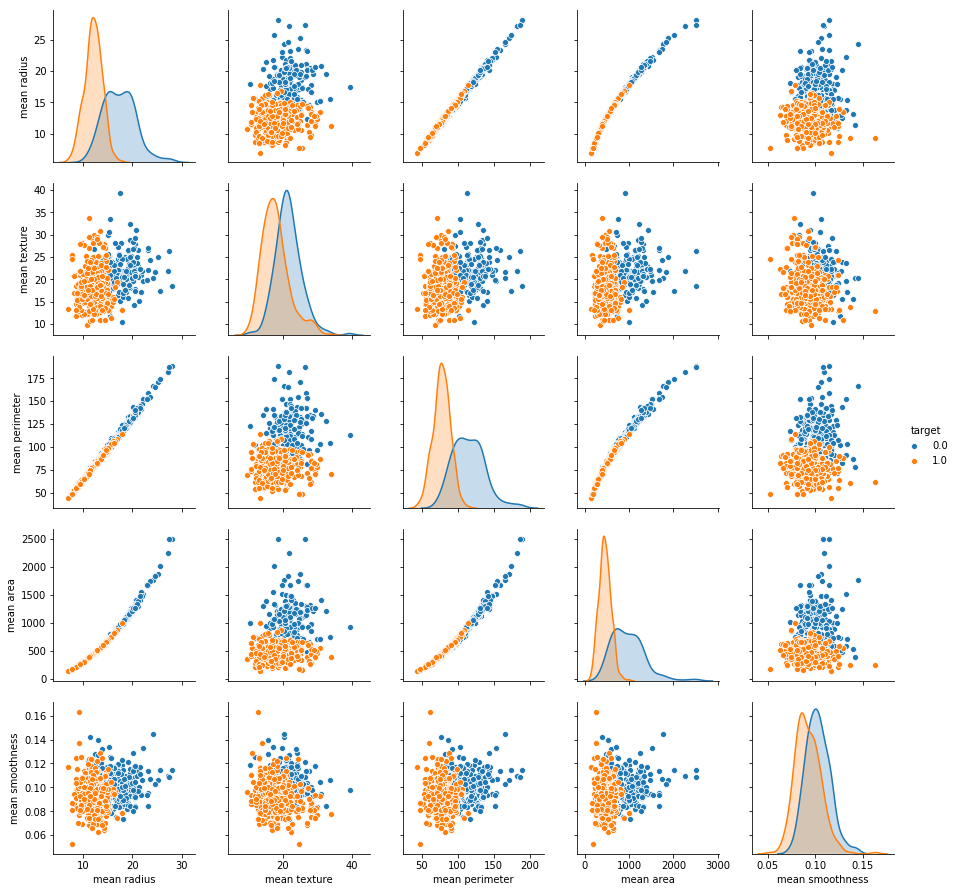

In [21]:
sb.pairplot(dataframe, hue = 'target', vars = ['mean radius','mean texture','mean perimeter','mean area','mean smoothness'])

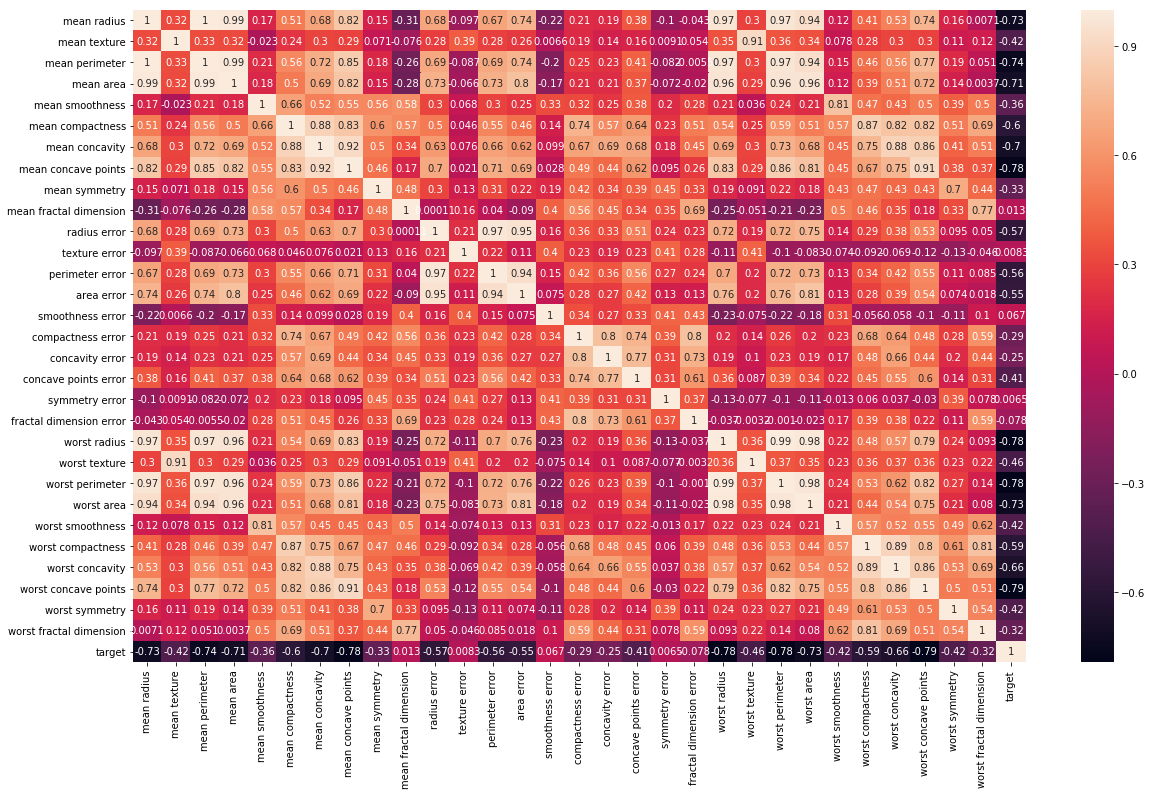

In [22]:
plt.figure(figsize=(20,12))
sb.heatmap(dataframe.corr(), annot=True)

In [23]:
X = dataframe.drop(['target'], axis = 1)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
y = dataframe['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=20)

In [26]:
X_train_min = X_train.min()
X_train_min

mean radius                  6.981000
mean texture                10.380000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   6.802000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.490000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [27]:
X_train_max = X_train.max()
X_train_max

mean radius                  28.11000
mean texture                 39.28000
mean perimeter              188.50000
mean area                  2501.00000
mean smoothness               0.14470
mean compactness              0.34540
mean concavity                0.42680
mean concave points           0.20120
mean symmetry                 0.30400
mean fractal dimension        0.09296
radius error                  2.87300
texture error                 4.88500
perimeter error              21.98000
area error                  542.20000
smoothness error              0.03113
compactness error             0.13540
concavity error               0.39600
concave points error          0.05279
symmetry error                0.07895
fractal dimension error       0.02984
worst radius                 36.04000
worst texture                49.54000
worst perimeter             251.20000
worst area                 4254.00000
worst smoothness              0.22260
worst compactness             1.05800
worst concav

In [28]:
X_train_range = (X_train_max - X_train_min)
X_train_range

mean radius                  21.129000
mean texture                 28.900000
mean perimeter              144.710000
mean area                  2357.500000
mean smoothness               0.092070
mean compactness              0.326020
mean concavity                0.426800
mean concave points           0.201200
mean symmetry                 0.198000
mean fractal dimension        0.043000
radius error                  2.761500
texture error                 4.524800
perimeter error              21.223000
area error                  535.398000
smoothness error              0.029417
compactness error             0.133148
concavity error               0.396000
concave points error          0.052790
symmetry error                0.071068
fractal dimension error       0.028945
worst radius                 28.110000
worst texture                37.050000
worst perimeter             200.790000
worst area                 4068.800000
worst smoothness              0.151430
worst compactness        

In [29]:
X_train_scaled = (X_train - X_train_min)/(X_train_range)
X_train_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
412,0.114345,0.391003,0.110290,0.053150,0.293907,0.126219,0.087512,0.025487,0.108081,0.401860,...,0.072394,0.418354,0.080681,0.028460,0.247177,0.156601,0.149201,0.088110,0.192682,0.242818
461,0.967343,0.549827,0.988943,1.000000,0.605735,0.550334,0.851687,0.839463,0.505556,0.145814,...,1.000000,0.509582,1.000000,1.000000,0.426137,0.386442,0.545767,0.902062,0.255643,0.126131
532,0.317052,0.205882,0.303849,0.183245,0.435973,0.163088,0.041050,0.093439,0.288384,0.269535,...,0.281750,0.208097,0.254943,0.144564,0.364723,0.125263,0.096326,0.299107,0.294844,0.149416
495,0.373373,0.340138,0.361620,0.227953,0.469643,0.196522,0.159888,0.246074,0.215657,0.174884,...,0.287442,0.431579,0.266398,0.147070,0.333025,0.108188,0.135783,0.349485,0.191019,0.071822
13,0.419755,0.469550,0.414000,0.271135,0.340828,0.247899,0.232849,0.266600,0.397475,0.079535,...,0.316969,0.409447,0.306738,0.169903,0.276894,0.160191,0.185463,0.384536,0.295557,0.051358


In [30]:
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(X_train_scaled)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [32]:
seed = 0
np.random.seed(seed)
import warnings

In [33]:
rf = RandomForestClassifier(n_estimators = 100)
with warnings.catch_warnings ():
             warnings. filterwarnings ( "ignore" , category = ConvergenceWarning ,module = "sklearn" )
et = ExtraTreesClassifier(n_estimators = 100 )
with warnings.catch_warnings ():
             warnings. filterwarnings ( "ignore" , category = ConvergenceWarning ,module = "sklearn" )
knn = KNeighborsClassifier(n_neighbors = 100)
with warnings.catch_warnings ():
             warnings. filterwarnings ( "ignore" , category = ConvergenceWarning ,module = "sklearn" )
svc = LinearSVC()
with warnings.catch_warnings ():
             warnings. filterwarnings ( "ignore" , category = ConvergenceWarning ,module = "sklearn" )
dt = DecisionTreeClassifier()
with warnings.catch_warnings ():
             warnings. filterwarnings ( "ignore" , category = ConvergenceWarning ,module = "sklearn" )
nb = GaussianNB()
with warnings.catch_warnings ():
             warnings. filterwarnings ( "ignore" , category = ConvergenceWarning ,module = "sklearn" )
mlp = MLPClassifier()
with warnings.catch_warnings ():
             warnings. filterwarnings ( "ignore" , category = ConvergenceWarning ,module = "sklearn" )

In [34]:
clf_array = [rf, et, knn, svc, dt, nb, mlp]
for clf in clf_array:
    scores = cross_val_score(clf, x_train_sc, y_train, cv=3, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, 
       max_samples=0.8, max_features=1.0, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=3, 
       n_jobs=-1)
    
    print("Media de: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__, scores.mean(),
                                                               scores.std()))
    print("Media de: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__
                                                                         ,bagging_scores.mean(),
                                                                         bagging_scores.std()))

Media de: 0.952, std: (+/-) 0.012 [RandomForestClassifier]
Media de: 0.956, std: (+/-) 0.010 [Bagging RandomForestClassifier]

Media de: 0.954, std: (+/-) 0.009 [ExtraTreesClassifier]
Media de: 0.961, std: (+/-) 0.007 [Bagging ExtraTreesClassifier]

Media de: 0.903, std: (+/-) 0.022 [KNeighborsClassifier]
Media de: 0.886, std: (+/-) 0.045 [Bagging KNeighborsClassifier]

Media de: 0.952, std: (+/-) 0.014 [LinearSVC]
Media de: 0.933, std: (+/-) 0.009 [Bagging LinearSVC]

Media de: 0.917, std: (+/-) 0.016 [DecisionTreeClassifier]
Media de: 0.949, std: (+/-) 0.018 [Bagging DecisionTreeClassifier]

Media de: 0.930, std: (+/-) 0.017 [GaussianNB]
Media de: 0.939, std: (+/-) 0.020 [Bagging GaussianNB]

Media de: 0.958, std: (+/-) 0.006 [MLPClassifier]
Media de: 0.938, std: (+/-) 0.011 [Bagging MLPClassifier]



In [35]:
from sklearn.ensemble import VotingClassifier
import warnings
from sklearn.exceptions import ConvergenceWarning

In [36]:
clf_array = [rf, et, knn, svc, dt, nb, mlp]
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et), ('KNeighbors', knn), ('LinearSVC', svc), ('Decision Tree Classifier', dt), ('Naive Bayes', nb), ('MLPClassifier', mlp)], voting='hard')
for clf, label in zip([rf, et, knn, svc, dt, nb, mlp, eclf], ['Random Forest', 'Extra Trees', 'KNeighbors', 'LinearSVC', 'DecisionTree Classifier', 'Naive Bayes', 'MLPClassifier', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Exactitud: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Exactitud: 0.96 (+/- 0.03) [Random Forest]
Exactitud: 0.96 (+/- 0.03) [Extra Trees]
Exactitud: 0.91 (+/- 0.04) [KNeighbors]


c:\users\user\miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

Exactitud: 0.89 (+/- 0.09) [LinearSVC]
Exactitud: 0.92 (+/- 0.03) [DecisionTree Classifier]
Exactitud: 0.94 (+/- 0.03) [Naive Bayes]


c:\users\user\miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\user\miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Exactitud: 0.88 (+/- 0.09) [MLPClassifier]


c:\users\user\miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

Exactitud: 0.96 (+/- 0.03) [Ensemble]


In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg
from sklearn.ensemble import VotingClassifier

In [38]:
ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
xgb_boost = xg.XGBClassifier()

In [39]:
boost_array = [ada_boost, grad_boost, xgb_boost]
eclf = VotingClassifier(estimators=[('Ada Boost', ada_boost), ('GradientBoost', grad_boost), ('XGB', xgb_boost)], voting='hard')
labels = ['Ada Boost', 'Grad Boost', 'XG Boost', 'Ensemble']
for clf, label in zip([ada_boost, grad_boost, xgb_boost, eclf], labels):
    scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, scoring='accuracy')
    print("Media: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))


Media: 0.951, std: (+/-) 0.038 [Ada Boost]
Media: 0.956, std: (+/-) 0.037 [Grad Boost]
Media: 0.965, std: (+/-) 0.027 [XG Boost]
Media: 0.958, std: (+/-) 0.033 [Ensemble]


In [40]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import cross_val_score

In [41]:
from sklearn.preprocessing import LabelEncoder
encoder_object = LabelEncoder()

In [ ]:
RANDOM_SEED = 0
rf = RandomForestClassifier(n_estimators=5, random_state=RANDOM_SEED)
et = ExtraTreesClassifier(n_estimators=5, random_state=RANDOM_SEED)
knn = KNeighborsClassifier(n_neighbors=5)
svc = LinearSVC(C=10.0,max_iter=10000, random_state=RANDOM_SEED)
with warnings.catch_warnings ():
             warnings. filterwarnings ( "ignore" , category = ConvergenceWarning ,module = "sklearn" )
mlp = MLPClassifier(max_iter=10000,alpha=0.1,activation='logistic',solver='adam',random_state=RANDOM_SEED)
with warnings.catch_warnings ():
             warnings. filterwarnings ( "ignore" , category = ConvergenceWarning ,module = "sklearn" )
nb = GaussianNB()
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=RANDOM_SEED)
adab = AdaBoostClassifier(n_estimators=5)
gd = GradientBoostingClassifier()
with warnings.catch_warnings ():
             warnings. filterwarnings ( "ignore" , category = ConvergenceWarning ,module = "sklearn" )
lr = LogisticRegression( solver = 'lbfgs' ,   multi_class = 'auto')
with warnings.catch_warnings ():
             warnings. filterwarnings ( "ignore" , category = ConvergenceWarning ,module = "sklearn" )

sclf = StackingClassifier(classifiers=[rf, et, knn, svc, mlp, nb, dt, adab, gd],meta_classifier=lr)

classifier_array = [rf, et, knn, svc, mlp, nb, dt, adab, gd, sclf]
labels = [clf.__class__.__name__ for clf in classifier_array]
#med_list = []
#var_list = []

for clf, label in zip(classifier_array, labels):
    cv_scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Media: %0.4f (+/- %0.4f) [%s]" % (cv_scores.mean(), cv_scores.std(), label))
   # med_list.append(np.round(cv_scores.mean(),4))
   # var_list.append(np.round(cv_scores.std(),4))
    

#print("Media: %0.4f (+/- %0.4f) [%s]".format(np.round(cv_scores.mean(),4), np.round(cv_scores.std(),4), label))

Media: 0.9457 (+/- 0.0304) [RandomForestClassifier]
Media: 0.9456 (+/- 0.0238) [ExtraTreesClassifier]
Media: 0.9298 (+/- 0.0289) [KNeighborsClassifier]


c:\users\user\miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

Media: 0.9018 (+/- 0.0346) [LinearSVC]
Media: 0.9351 (+/- 0.0207) [MLPClassifier]
Media: 0.9387 (+/- 0.0301) [GaussianNB]
Media: 0.8981 (+/- 0.0349) [DecisionTreeClassifier]
Media: 0.9473 (+/- 0.0304) [AdaBoostClassifier]
Media: 0.9650 (+/- 0.0245) [GradientBoostingClassifier]


c:\users\user\miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\miniconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 